# <p style="text-align: center;"> <b>Mathematics in Machine Learning - Adele de Hoffer </b></p>

In [90]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="View Code"></form>''')

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
from sklearn.model_selection import train_test_split
from IPython.display import Image
from IPython.core.display import HTML 
from IPython.display import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from scipy.stats import shapiro
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline, make_pipeline

from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

# Introduction

Breast cancer is one of the most common cancer in women in the United States, it occur when cells in the breast begin to grow abnormaly.

In many case an early stage detection is the key for the patient's surviving, for this reason it is important to have tools that are able to identify these masses at early stages. 

 
The aim of this project is performing data mining tecniques to correctly identify these mass as **benign** or **malign**.

## Breast Cancer Wisconsin (Diagnostic) Data Set

In [30]:

#read data
data=pd.read_csv('data.csv')
data=data.drop(columns=['Unnamed: 32','id'])

### Description

The data for this analysis is the **Breast Cancer Wisconsin dataset**, that can be download at <link> https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)</link> 


The dataset is created starting from 569 digitized images of <a href="https://en.wikipedia.org/wiki/Fine-needle_aspiration">fine needle aspirate (FNA)</a> of breast masses. 


![image](figures/istological.png)

For each image 10 real-valued features are computed for each cell nucleus:


* Radius (mean of distances from center to points on the perimeter) direi micrometri
* Texture (standard deviation of gray-scale values)
* Perimeter
* Area
* Smoothness (local variation in radius lengths)
* Compactness (perimeter^2 / area - 1.0)
* Concavity (severity of concave portions of the contour)
* Concave points (number of concave portions of the contour)
* Symmetry
* Fractal dimension ("coastline approximation" - 1)

The measures for all the nuclei are then aggregate to create an overview of the image, for each feature is computed:
* Average 
* Standard Devation
* Worste (The average of the three worste values)

For each image these 30 features (10*3) are collected, together with the **ID** and the **diagnosis** associated: **B for benign and M for malign**.
We can drop ID since it is useless for the analysis.

So we created a dataset contains **569 elements describe by 31 features**.



In [31]:
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


### Features type 

In [32]:
features=data.columns
sing_feat=list(filter(lambda x: 'mean' in x,features))
sing_feat=list(map(lambda x: x[:-5],sing_feat))
index_1=[]
for el in sing_feat:
    for i in range(3):
        index_1.append(el)

Looking at the type of these features wer notice that only one attribute is categorical, instead all the other one are floats.



<table style="width:50%">
  <tr>
    <th>Faetures</th>
    <th>Measures</th>
    <th>Type</th>
  </tr>
  <tr>
    <td>Diagnosis</td> 
    <td>/</td>
    <td>categorical B/M</td>
  </tr>
  <tr>
    <td>Radius</td>
    <td>Mean <br> Standard Erros <br> Worst</td>
    <td>float</td>
  </tr>
  <tr>
    <td>Texture</td>
    <td>Mean <br> Standard Erros <br> Worst</td>
    <td>float</td>
  </tr>
    <tr>
    <td>Perimeter</td>
    <td>Mean <br> Standard Erros <br> Worst</td>
    <td>float</td>
  </tr>
    <tr>
    <td>Area</td>
    <td>Mean <br> Standard Erros <br> Worst</td>
    <td>float</td>
  </tr>
    <tr>
    <td>Smoothness</td>
    <td>Mean <br> Standard Erros <br> Worst</td>
    <td>float</td>
  </tr>
    <tr>
    <td>Compactness</td>
    <td>Mean <br> Standard Erros <br> Worst</td>
    <td>float</td>
  </tr>
    <tr>
    <td>Concavity</td>
    <td>Mean <br> Standard Erros <br> Worst</td>
    <td>float</td>
  </tr>
    <tr>
    <td>Concave points</td>
    <td>Mean <br> Standard Erros <br> Worst</td>
    <td>float</td>
  </tr>
    <tr>
    <td>Symmetry</td>
    <td>Mean <br> Standard Erros <br> Worst</td>
    <td>float</td>
  </tr>
    <tr>
    <td>Fractal dimension</td>
    <td>Mean <br> Standard Erros <br> Worst</td>
    <td>float</td>
  </tr>
</table
    
    


### Missing values

Removing null values is an important step in order to not have useless information, or informartion that can sabotage our analysis. In this case we can or remove missing values or fix them using the mean of the feature associated to them.

Luckyly, this dataset does not present missing values, so we can proceed with the analysis!

In [33]:
a=data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

### Labels Distribution

The first notaceable thing is the umbalanced of the dataset, as shown in the picture below only 37.7% of the dataset contains sample associated to the M class.

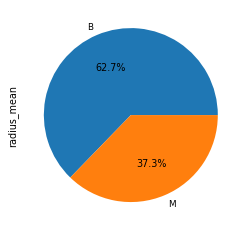

In [34]:
c=data.groupby('diagnosis').count()['radius_mean']
c.plot.pie(autopct="%.1f%%")

As shown below, the mean of the range of value for the attributes is really different, so before proceeding it is better to perform some normalization techniques

In [35]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## Train test split 

It is needed to be divided into the **train set and the test set**.
Our algorithm will be trained of the train set and then it will be test on the test set. It is important to perform our analysis and trai our algorithm without know anything about the data for testing. In this way we are sure that the preocedure is unbiased.

We utilize 80% for the train and 20% for the test, also we stratify by labels in order to mantein the same balance of classes between these two sets,also the data are shuffle to avoid to have at every time the same split.



In [36]:
cols=list(data.columns)
X=data[cols[1:]]
y=data[cols[0]]

X_train, X_test, y_train, y_test =train_test_split (X, y,stratify=y, test_size= 0.2)
X_train

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
310,11.70,19.11,74.33,418.7,0.08814,0.05253,0.01583,0.01148,0.1936,0.06128,...,12.61,26.55,80.92,483.1,0.1223,0.1087,0.07915,0.05741,0.3487,0.06958
547,10.26,16.58,65.85,320.8,0.08877,0.08066,0.04358,0.02438,0.1669,0.06714,...,10.83,22.04,71.08,357.4,0.1461,0.2246,0.17830,0.08333,0.2691,0.09479
420,11.57,19.04,74.20,409.7,0.08546,0.07722,0.05485,0.01428,0.2031,0.06267,...,13.07,26.98,86.43,520.5,0.1249,0.1937,0.25600,0.06664,0.3035,0.08284
40,13.44,21.58,86.18,563.0,0.08162,0.06031,0.03110,0.02031,0.1784,0.05587,...,15.93,30.25,102.50,787.9,0.1094,0.2043,0.20850,0.11120,0.2994,0.07146
26,14.58,21.53,97.41,644.8,0.10540,0.18680,0.14250,0.08783,0.2252,0.06924,...,17.62,33.21,122.40,896.9,0.1525,0.6643,0.55390,0.27010,0.4264,0.12750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510,11.74,14.69,76.31,426.0,0.08099,0.09661,0.06726,0.02639,0.1499,0.06758,...,12.45,17.60,81.25,473.8,0.1073,0.2793,0.26900,0.10560,0.2604,0.09879
213,17.42,25.56,114.50,948.0,0.10060,0.11460,0.16820,0.06597,0.1308,0.05866,...,18.07,28.07,120.40,1021.0,0.1243,0.1793,0.28030,0.10990,0.1603,0.06818
421,14.69,13.98,98.22,656.1,0.10310,0.18360,0.14500,0.06300,0.2086,0.07406,...,16.46,18.34,114.10,809.2,0.1312,0.3635,0.32190,0.11080,0.2827,0.09208
193,12.34,26.86,81.15,477.4,0.10340,0.13530,0.10850,0.04562,0.1943,0.06937,...,15.65,39.34,101.70,768.9,0.1785,0.4706,0.44250,0.14590,0.3215,0.12050


# Preprocessing
## Standardization

As seen in the previous plot, the values of different features differ a lot (see fractal and area).
So it is needed to standardize the dataset using a standard scaler approach: for each feature we substacted the mean and divided by the standard deviation.

<div class='math'>
\begin{equation}
    z=
    \frac{x- \mu}{\sigma}
    \end{equation}
    </div>

In this way all the features are standardized to have 0 mean and unit variance.
This step is needed in order to not have features that might be weighted more only beacuse their range is bigger. 


In [37]:
scaled_features = StandardScaler().fit_transform(X_train.values)
scaled_features_df = pd.DataFrame(scaled_features, index=X_train.index, columns=X_train.columns)
scaled_features_df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
310,-0.702916,-0.048485,-0.737695,-0.687798,-0.600646,-0.976356,-0.916613,-0.963099,0.471874,-0.201241,...,-0.765357,0.122292,-0.788695,-0.702746,-0.467773,-0.926631,-0.919942,-0.878054,1.007531,-0.813745
547,-1.112350,-0.617896,-1.086732,-0.968194,-0.554035,-0.438584,-0.562312,-0.628707,-0.520451,0.658025,...,-1.129073,-0.600073,-1.077252,-0.918884,0.610336,-0.188730,-0.444904,-0.480393,-0.353688,0.632549
420,-0.739879,-0.064240,-0.743046,-0.713575,-0.798930,-0.504348,-0.418422,-0.890518,0.824949,0.002578,...,-0.671363,0.191165,-0.627115,-0.638437,-0.349997,-0.385461,-0.072634,-0.736449,0.234577,-0.053021
40,-0.208183,0.507422,-0.249949,-0.274506,-1.083038,-0.827623,-0.721652,-0.734209,-0.093045,-0.994522,...,-0.086965,0.714920,-0.155863,-0.178650,-1.052126,-0.317974,-0.300212,-0.052815,0.164464,-0.705890
26,0.115953,0.496169,0.212278,-0.040222,0.676359,1.590533,0.700658,1.016033,1.646313,0.965953,...,0.258361,1.189022,0.427703,0.008773,0.900247,2.610711,1.354639,2.385008,2.336258,2.509117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510,-0.691543,-1.043266,-0.656198,-0.666890,-1.129649,-0.133662,-0.259976,-0.576605,-1.152269,0.722543,...,-0.798051,-1.311226,-0.779018,-0.718737,-1.147254,0.159529,-0.010350,-0.138730,-0.502465,0.862028
213,0.923448,1.403175,0.915703,0.828178,0.321225,0.210259,1.028785,0.449382,-1.862135,-0.585418,...,0.350312,0.365750,0.369053,0.222159,-0.377176,-0.477142,0.043790,-0.072760,-2.214249,-0.894063
421,0.147229,-1.203061,0.245618,-0.007857,0.506191,1.529358,0.732577,0.372394,1.029361,1.672720,...,0.021333,-1.192701,0.184306,-0.142025,-0.064615,0.695606,0.243100,-0.058952,-0.121118,0.477076
193,-0.520945,1.695757,-0.456984,-0.519674,0.528387,0.605989,0.266560,-0.078128,0.497891,0.985015,...,-0.144179,2.170862,-0.179323,-0.211320,2.078013,1.377480,0.820909,0.479548,0.542390,2.107528


## Normality Test

It is  useful to check if the data distributions come from a normal distribution, in order to use the right algorithms.

To do so, a Saphiro-Wilk test is performed

* **Null Hypotesis**: The data have a normal distribution
* **Alterntive Hypotesis**: The data have NO a normal distribution

The test statistic is:
$W= \frac{(\sum_{i=1}^{N}a_i x_{(i)})^2}{\sum_{i=1}^{N}(x_i-\bar{x})}$

where $x_{(i)}$ is the i-th smallest number in the sample, $\bar{x}$ is the sample mean and $a_i$ are coefficients derived from a normal distributions.
The value of $\alpha$ is set to 0.05 in this way:
* if $p\leq\alpha$ we reject the null hypotesis that the distribution is normal
* if $p>\alpha$ we accept the null hypotesis that the distribution is normale

The test is performed for each statistics and leave the following results.

In [38]:
cols=list(scaled_features_df.columns)
ps=[]
results=[]
for col in cols:
    _,p= shapiro(scaled_features_df[col])
    ps.append(p)
    if p<= 0.05:
        results.append('NOT normal')
    else:
        
        results.append('Normal')
p_df=pd.DataFrame()
p_df['p value']=ps
p_df['Result']= results
p_df['Feature']=cols
p_df=p_df.set_index('Feature')
p_df

,p value,Result
Feature,,
radius_mean,5.570158e-12,NOT normal
texture_mean,1.641604e-07,NOT normal
perimeter_mean,1.145801e-12,NOT normal
area_mean,4.389585e-19,NOT normal
smoothness_mean,9.252876e-05,NOT normal
compactness_mean,4.348494e-15,NOT normal
concavity_mean,2.287901e-19,NOT normal
concave points_mean,6.865335e-18,NOT normal
symmetry_mean,1.052141e-06,NOT normal


Since all the p values are less then the treshold none of the distribution is normal.

### Boxplots


We can have a look at the features using boxplot graphs, this kind of plots utilizes quartiles to decribe the data distribution.
<img src="figures/boxplot.png" width="500">

In particular, the center bar represents the median, and the extremes of the box the first quartiles, this means that half of the data are contained inside the box (**Interquartile range**).

The wisker are defined as 1.$5*IQM$, the end of each of them repersents the minimum and the maximum of the distribution, furthermore samples that are outside the whiskers are identify as outliers and are shown as points. In fact, boxplots are useful tool to visualize outliers.

For simplicity, we plot the distributions of each feature mean separed by labels.

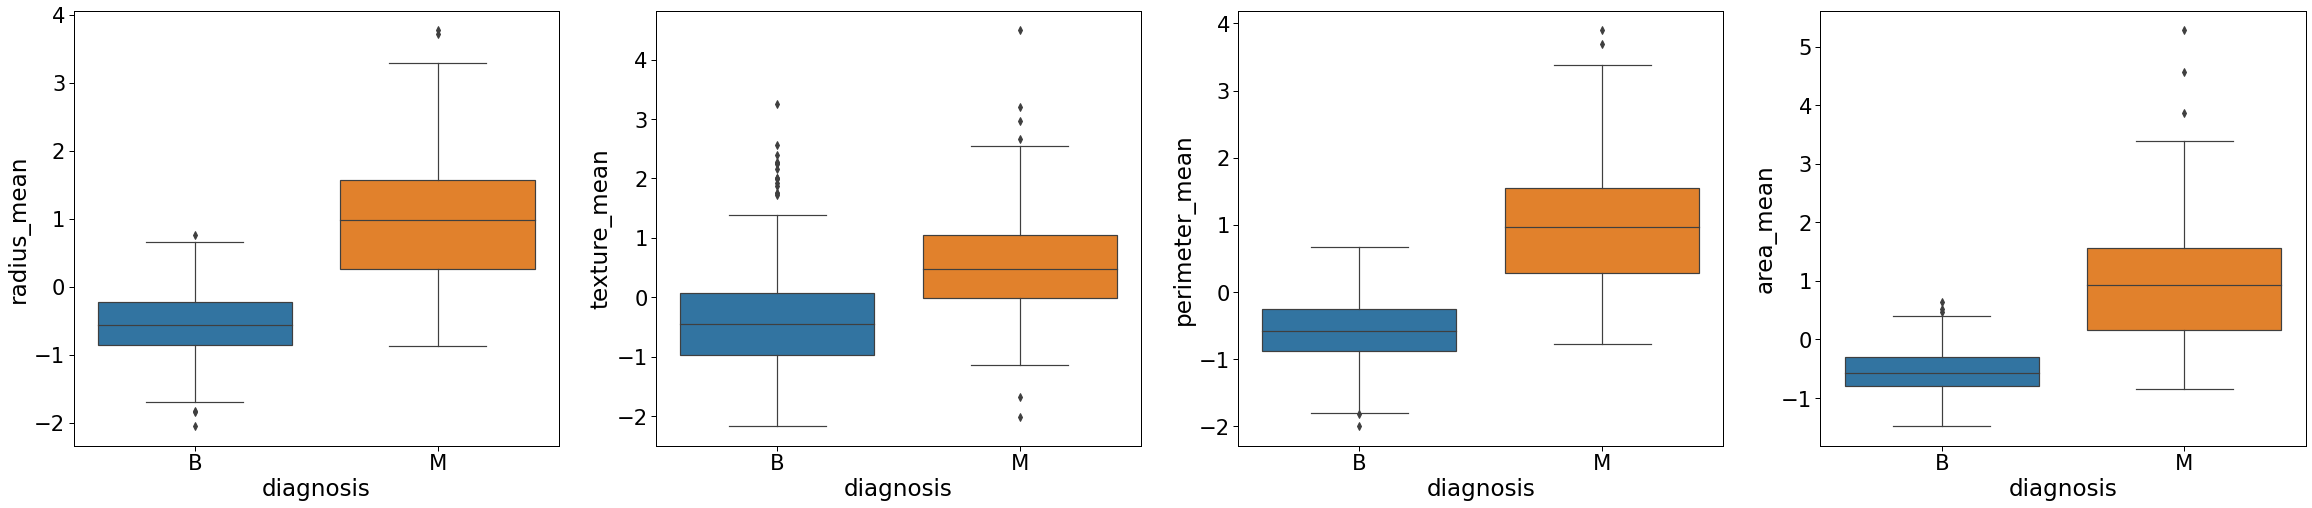

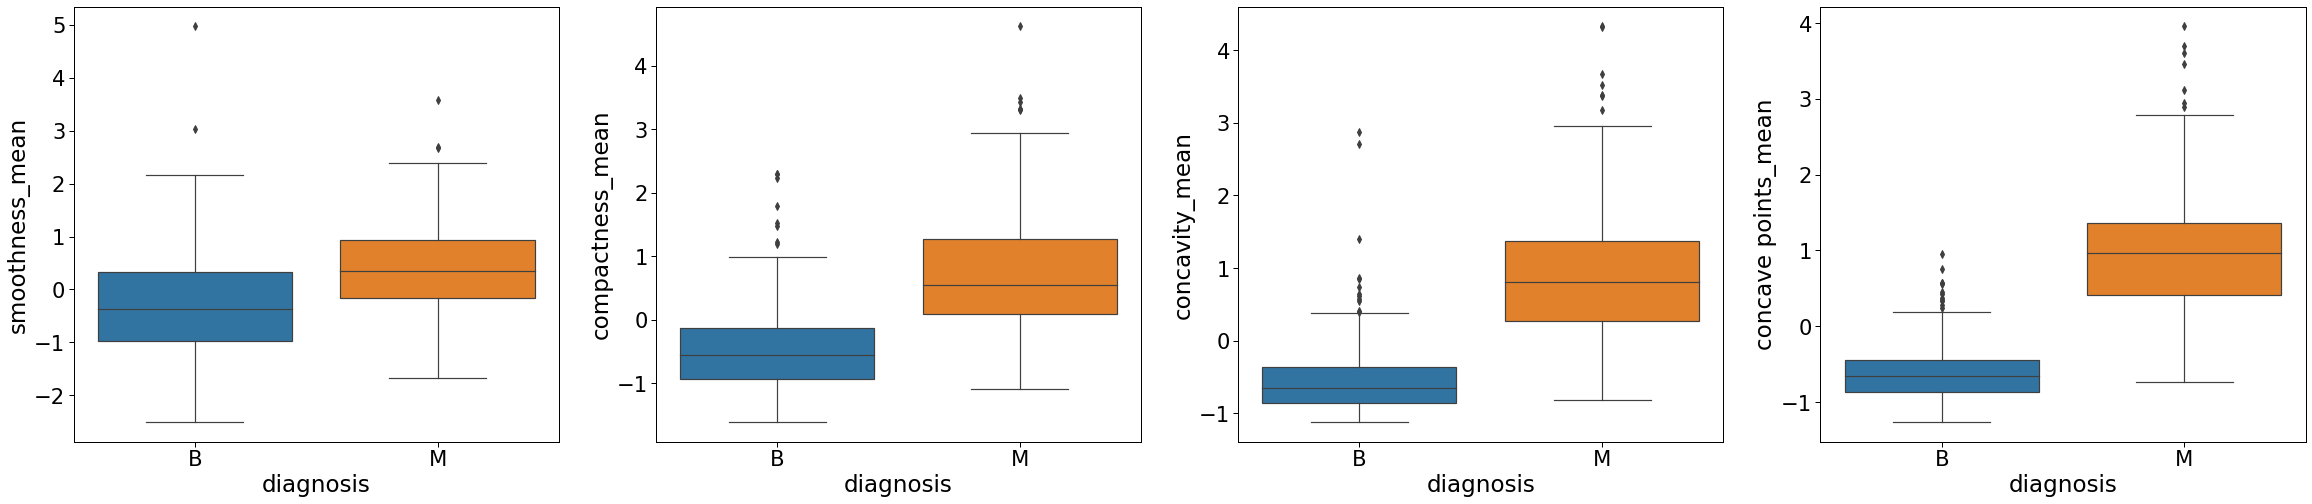

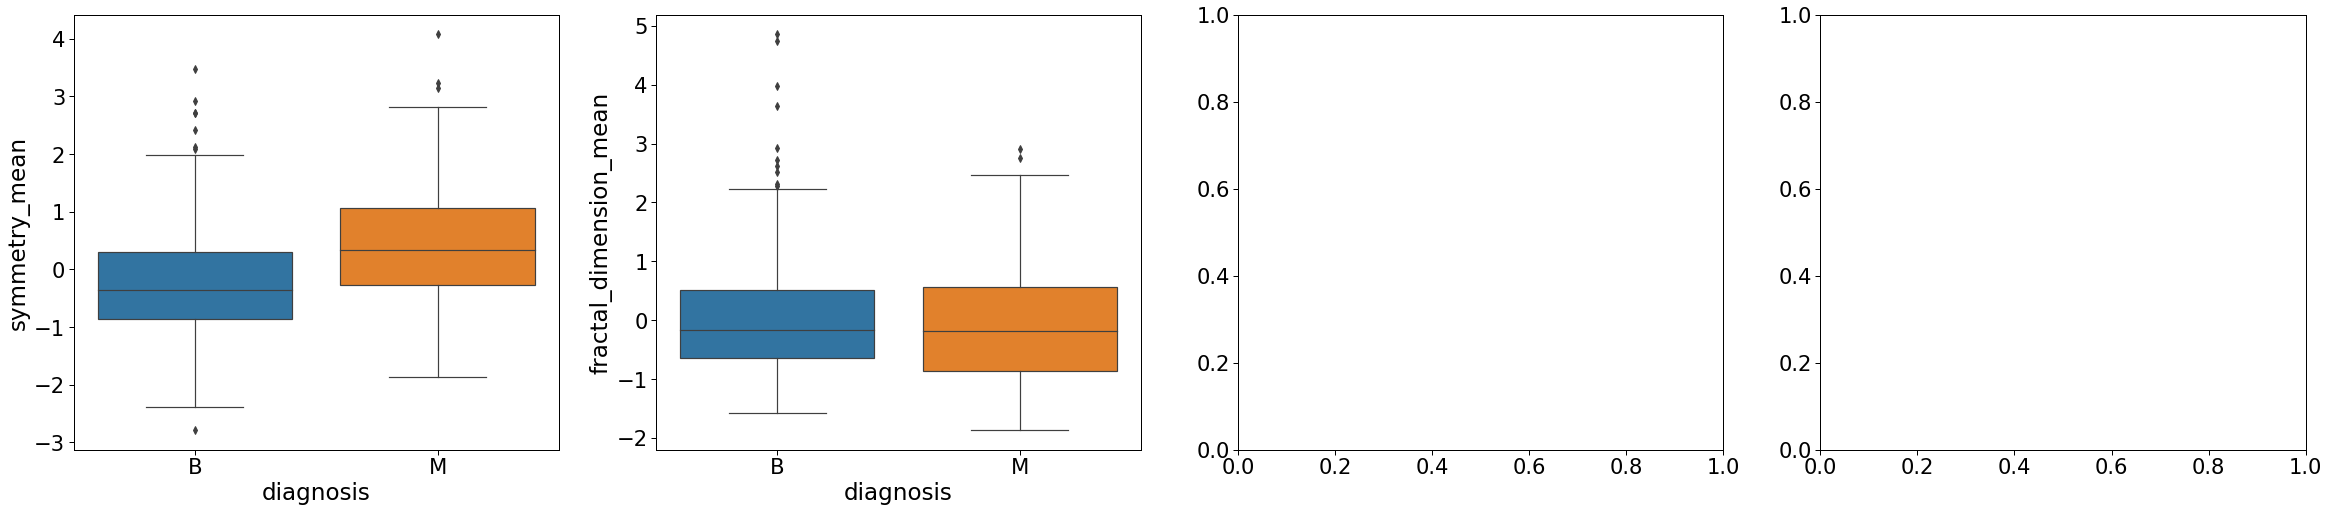

In [40]:
sns.set_context("paper", font_scale=2.4)  
fig,ax = plt.subplots(1,4,figsize=(40,8))
scaled_features_df['diagnosis']=y_train
cnt=0
i=0
for col in cols:
    if 'mean' in col:
        
        sns.boxplot(data=scaled_features_df,x='diagnosis',y=col,ax=ax[i])
        
        i=i+1
        cnt=cnt+1
        if i==4:
            plt.show()
            
            fig,ax = plt.subplots(1,4,figsize=(40,8))
            i=0
        

As we can see, we can already find a good division between classes for 
* Concavity mean
* Concavity points mean
* Radius, Perimeter and area 

In fact, malign masses are characterized by a bigger and more irregular shape.

### Density plots

Also, for each attribute and each class it is possible to show the distribution for each attribute.

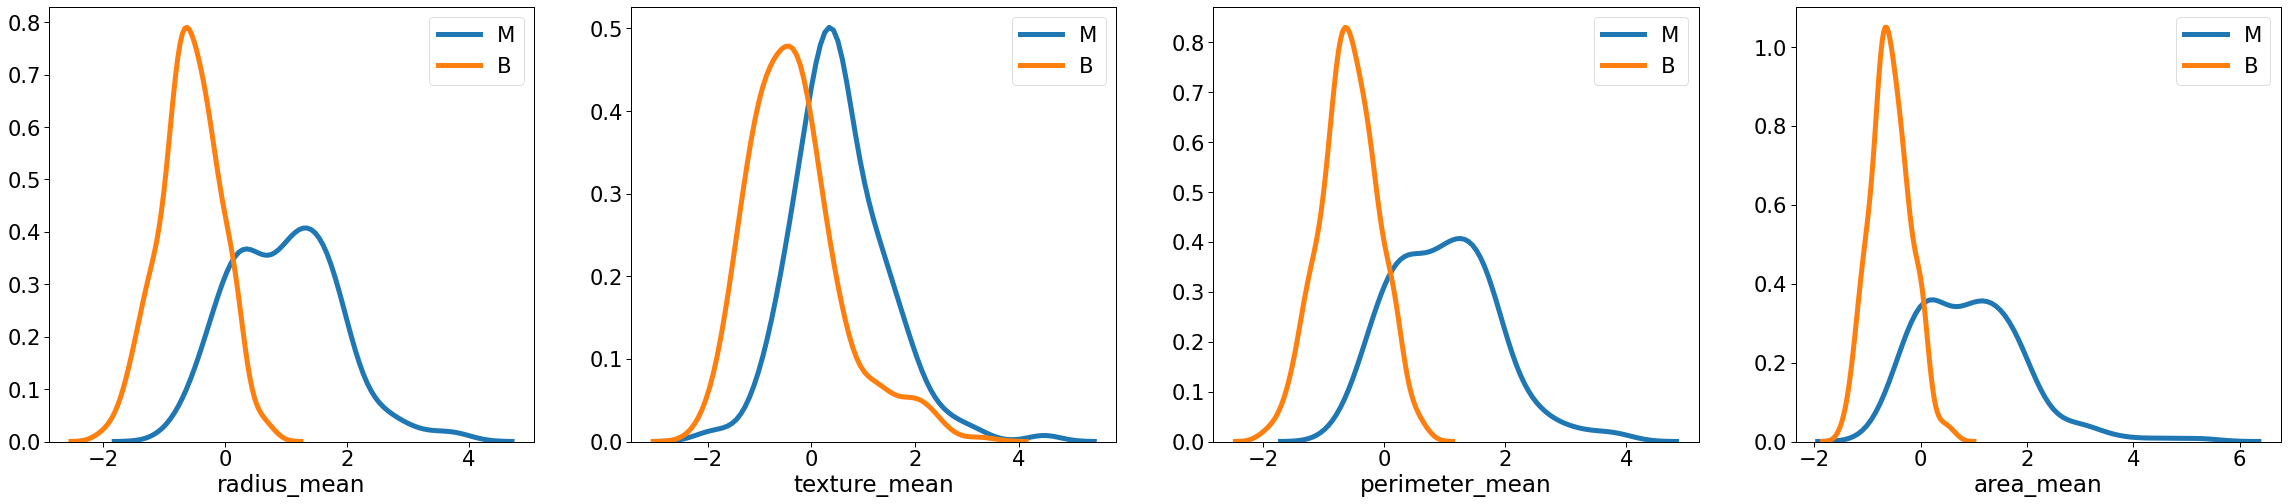

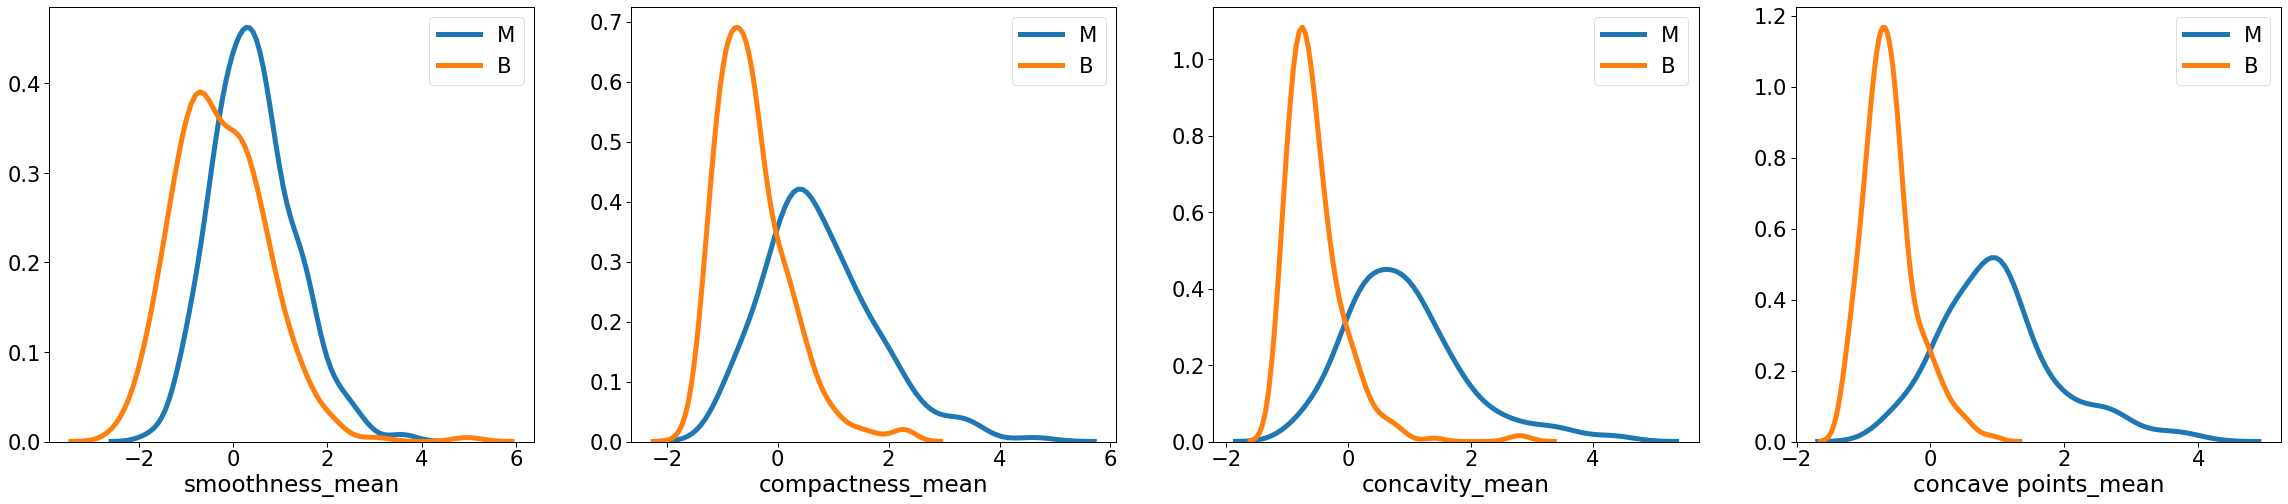

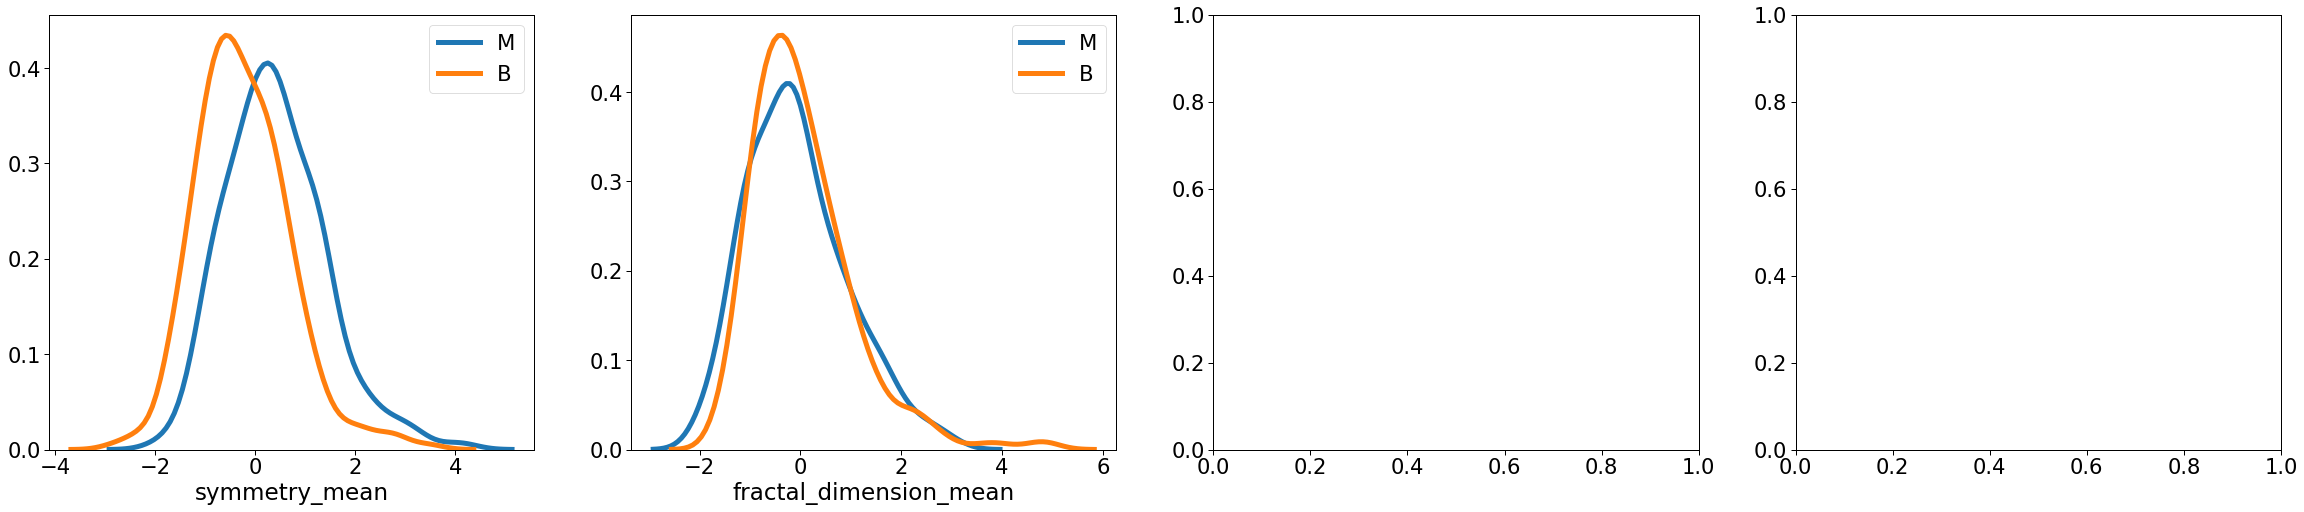

In [41]:
scaled_features_df['diagnosis']=y_train
sns.set_context("paper", font_scale=2.4) 
fig,ax = plt.subplots(1,4,figsize=(40,8))
i=0
for col in cols:
    if 'mean' in col:
        
        sns.distplot(scaled_features_df[scaled_features_df['diagnosis']=='M'][col],label='M',ax=ax[i],hist=False,kde_kws=dict(linewidth=5))
        sns.distplot(scaled_features_df[scaled_features_df['diagnosis']=='B'][col],label='B',ax=ax[i],hist=False,kde_kws=dict(linewidth=5))
        
        
        i=i+1
        if i==4:
            plt.legend()
            plt.show()
            fig,ax = plt.subplots(1,4,figsize=(40,8))
            i=0

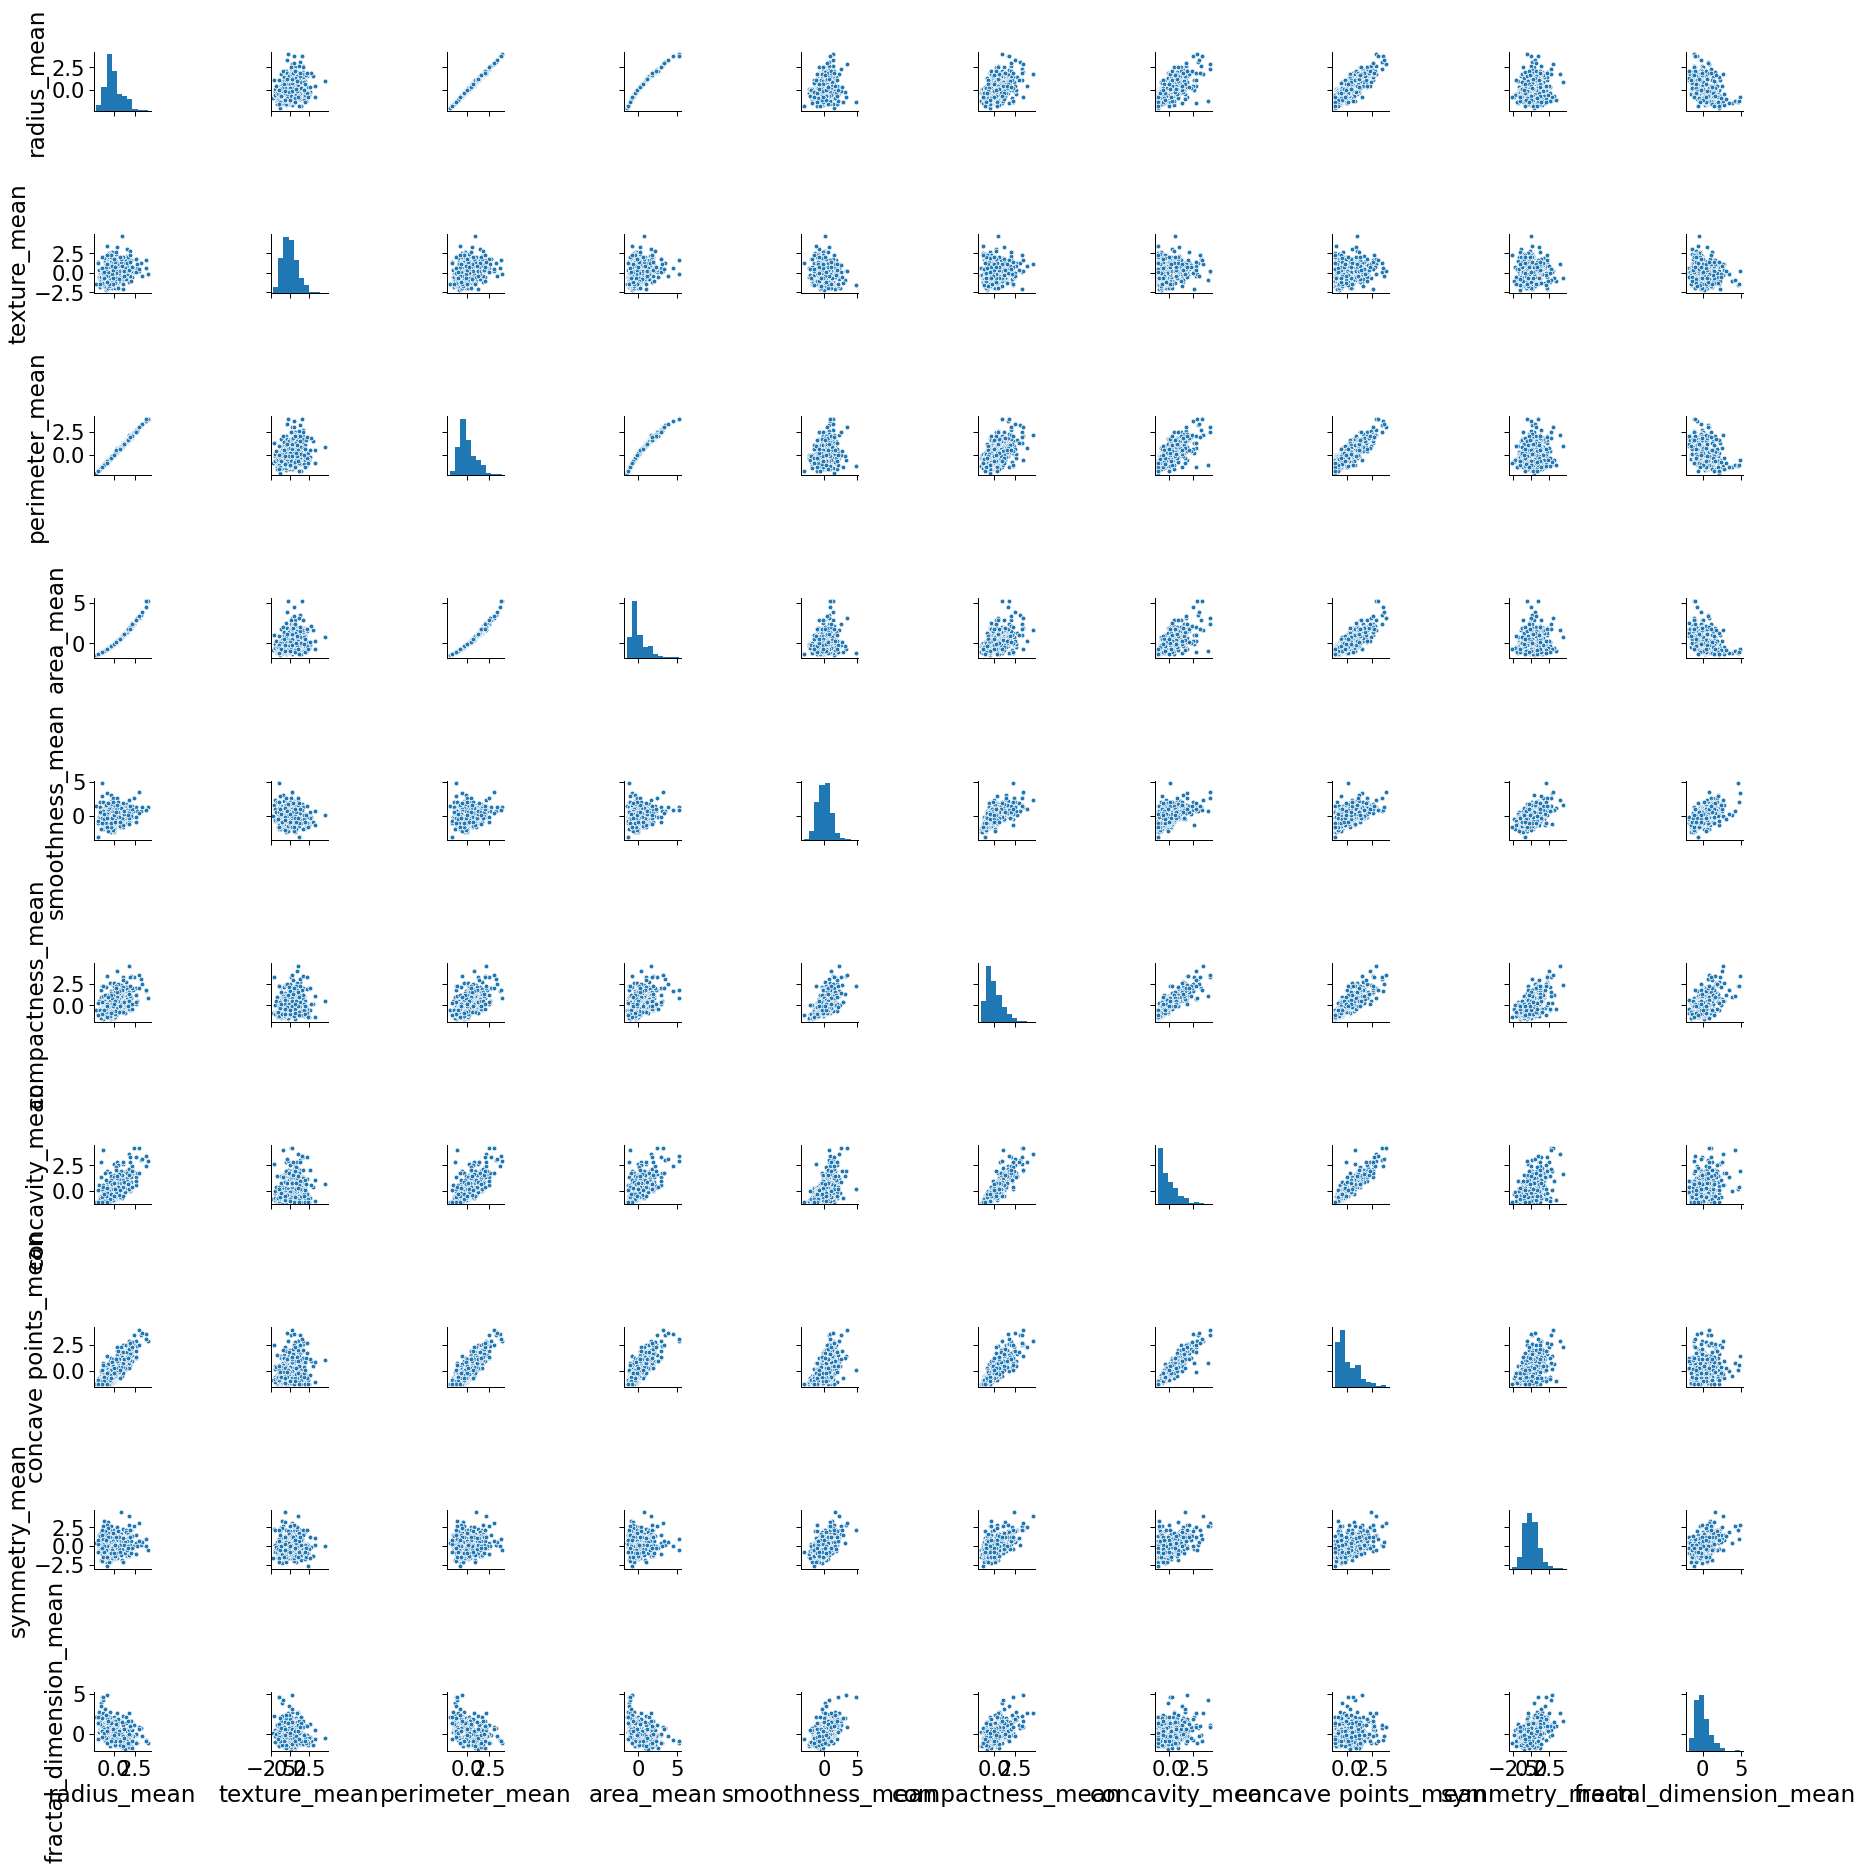

In [13]:
mask=[True if 'mean' in x else False for x in cols]
sns.set_context() 
sns.pairplot(scaled_features_df[np.array(cols)[mask]])
plt.show()

## Correlation analysis 

To perform better and faster our algorithm is better to reduce the dimensionality od our dataset, to do so we can follow 2 different paths:
* Features selection, we select the most important features and discard the other ones 
* Features extraction tool, like PCA. We create new features from the orginal ones. 

For the features selection phase it is useful to look at the correlation matrix, in order to select only the features that don't carry redundant information.

As it can be seen in the correlation matrix some features are strongly correlated.
Pearson correlation index is a measure of linear correlation between two sets of data. Correlated features are reduntant information that may lead to overfit the dataset, for this reason it is suggested to remove them
It measures how 2 variables are related.

$\rho_{x,y}= corr(X,Y)= \frac{E[(X-\mu_x)(Y-\mu_y)]}{\sigma_x\sigma_y}$

* A positive coefficient means that as one measure increases the other one increases as well.
* A negative coefficient means that as one measure increases the one one decreases
* A null coefficient does not add any information

Here we can visualize the correlation matrix among all the features, as we can see there are some features that are highly correlated, so we can decide to preserve just one of them.



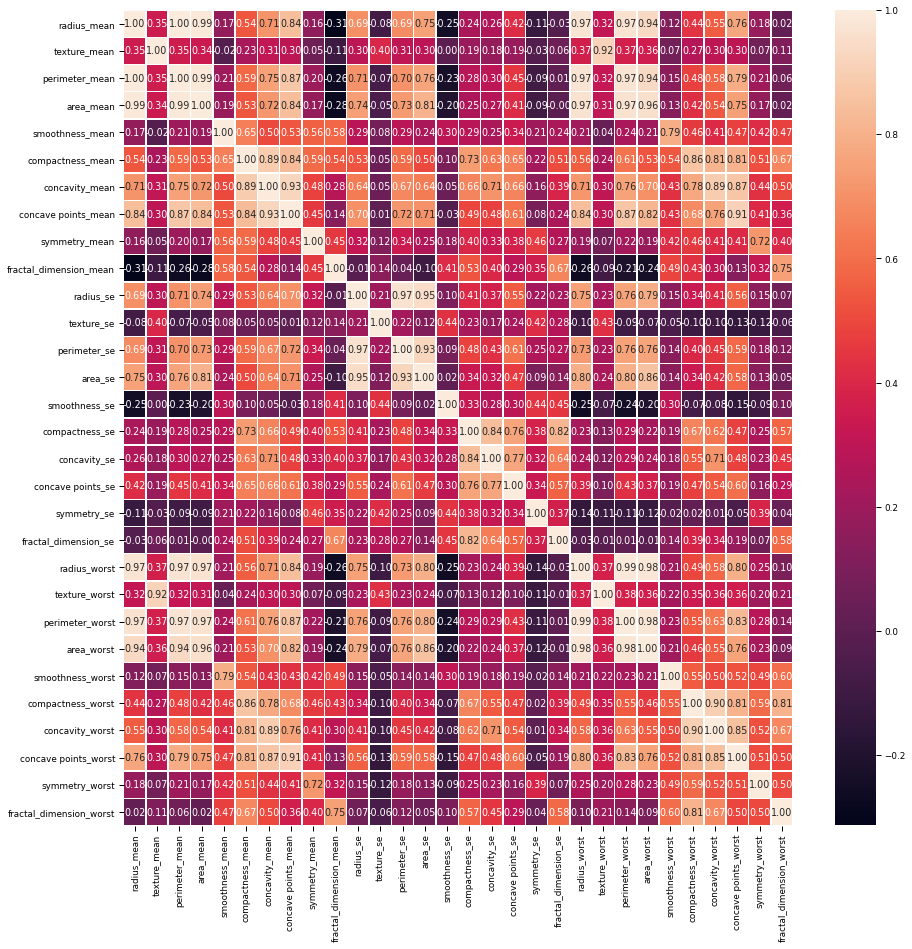

In [42]:
sns.set_context("paper", font_scale=1)
f,ax = plt.subplots(figsize=(15, 15))
c_m=scaled_features_df.corr()

sns.heatmap(c_m,annot=True,linewidths=.5, fmt='.2f',ax=ax)
plt.show()


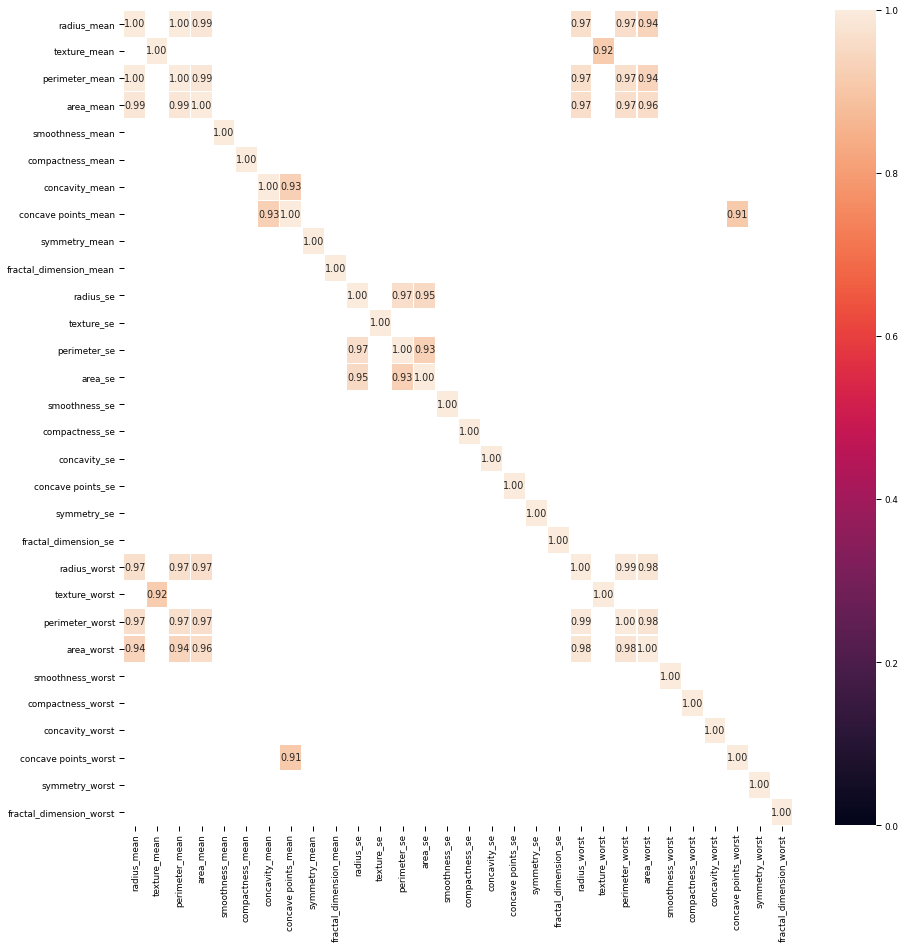

In [43]:
sns.set_context("paper", font_scale=1)
f,ax = plt.subplots(figsize=(15, 15))
c_m=scaled_features_df.corr()

sns.heatmap(c_m[abs(c_m)>0.9],annot=True,linewidths=.5, fmt='.2f',ax=ax,vmin=0, vmax=1)
plt.show()


Here we can see a list of the mot correlated features:

In [44]:
for i in range(len(c_m)):
    a=c_m[abs(c_m)>0.9].iloc[i][c_m[abs(c_m)>0.9].iloc[i]>0.9]
    if len(a)>1:
        print(a)
        print()



radius_mean        1.000000
perimeter_mean     0.997897
area_mean          0.988142
radius_worst       0.970461
perimeter_worst    0.966338
area_worst         0.938353
Name: radius_mean, dtype: float64

texture_mean     1.000000
texture_worst    0.916544
Name: texture_mean, dtype: float64

radius_mean        0.997897
perimeter_mean     1.000000
area_mean          0.987612
radius_worst       0.969784
perimeter_worst    0.971045
area_worst         0.938434
Name: perimeter_mean, dtype: float64

radius_mean        0.988142
perimeter_mean     0.987612
area_mean          1.000000
radius_worst       0.968147
perimeter_worst    0.965199
area_worst         0.961486
Name: area_mean, dtype: float64

concavity_mean         1.000000
concave points_mean    0.927732
Name: concavity_mean, dtype: float64

concavity_mean          0.927732
concave points_mean     1.000000
concave points_worst    0.910738
Name: concave points_mean, dtype: float64

radius_se       1.000000
perimeter_se    0.968375
area_se 

**radius_mean** is positive correlated with perimeter_mean,area_mean, radius_worst, perimeter_worst and area_worst  

**texture_mean** is positive correlated with texture_worst

**concavity_mean** is positive correlated with concave points_mean

**radius_se** is positive correlated with perimeter_se and area_se 

So we can mantein only the bold features and discard the other ones.

In [45]:
s_m=c_m[(c_m>0.9) | (c_m <-0.9)]
s = s_m.unstack()
so = s.sort_values(kind="quicksort",ascending=False)
so=so[so!=1][:50]
#so.keys()[::2]

In [46]:
col_to_drop=['perimeter_mean','area_mean', 'radius_worst', 'perimeter_worst', 'area_worst', 'texture_worst', 'concave points_mean','perimeter_se', 'area_se']
scaled_features_df=scaled_features_df.drop(columns=col_to_drop)


We can plot the correlation among **radius_meand** and **perimeter_mean and area_mean**, in fact as expected the correlation between radius and perimeter is linear, instead the correlation between radius and area is quadratic.

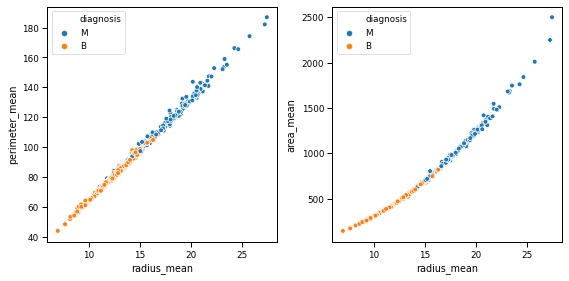

In [65]:
sns.set_context("paper", font_scale=1)
fig, ax = plt.subplots(1,2,figsize=(8,4))    
sns.scatterplot(x=data['radius_mean'], y=data['perimeter_mean'], data=scaled_features_df, hue="diagnosis", ax=ax[0])
sns.scatterplot(x=data['radius_mean'], y=data['area_mean'], data=scaled_features_df, hue="diagnosis", ax=ax[1])  
   
plt.tight_layout()
plt.show()

## PCA

PCA is a dimensionality reduction tool that maps a matrix x of m dimensional input features into a Wx matrix wich is k dimensional with d<m, the aim is to reduce the dimension of the matrix with losing less information as possible.

The final aim is to find a space d<D that maintains most of the data variability hence the new variables are a linear combination of the original features and form an ortonormal basis which define a new coordinate system

Concretely it is a linear dimensionality reduction approach that performs $x \rightarrow Wx$  where $W \in R^{nxd}$ and n < d.


So, at the end each instance of the original dataset $x_i$ will be map to a subspace $z_i=a_1\phi_1 + a_2\phi_2+...+a_n\phi_n$. 


The new variable forma a new coordinate system 
The $\phi_i$ are called loading vectors and are the component along which the data vary the most, $a_i$ are the weight associated to each leading direction and represent the projection of the original instance on that vector.\\
How can we define them?? \\
We can use the linear recovery vector $y = Wx$, that implies $\tilde{x} = Uy = UWx$, so it becames an optimization problem such that:
\begin{equation}
\arg\min_{W \in R^{n,d}U \in R^{d,n}} \sum_{i=1}^{m} ||x_i - UWx_i ||^2
\end{equation}

The solution is to set U to be the leading eigenvectors of $A = \sum{x*x}$

Also, we can decompose the total variance of the data, ie we can see the percentage of the information that is express from each new component.
In this case the first component $\phi_1$ retrieve the most part of the information, the component $\phi_2$ the second part and so on.

It is shown that using only 6 features we explain 85% the dataset

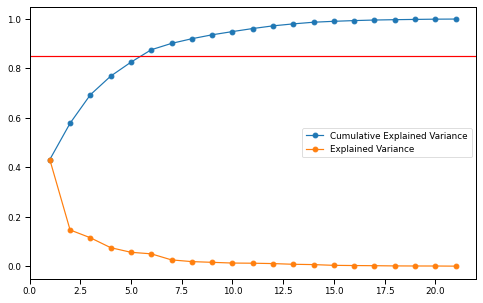

In [67]:
#PCA
scaled_features_df=scaled_features_df.drop(columns='diagnosis')
X=scaled_features_df
pca = PCA(n_components=21)
X_projection = pca.fit_transform(X)
fig = plt.figure(figsize=(8,5))
ex_var=pca.explained_variance_ratio_
plt.plot(range(1,len(ex_var)+1),np.cumsum(ex_var),marker='o',label='Cumulative Explained Variance')
plt.plot(range(1,len(ex_var)+1),ex_var,marker='o',label='Explained Variance')
plt.axhline(0.85,c='r')
plt.legend()
plt.show()


pca = PCA(n_components=6)
X_red = pca.fit_transform(X)

### Outliers detection


In oder to optimize the performance of the algorithm it is good to eliminate samples that may lead to a incorrect analysis.

A seen in the previous graphs there are some outliers that should be take care of, to do so we can proceed in two ways:
* Removing outliers from the whole dataset
* Removing the outliers from the two different class

The graphs already shows that the 2 distributions are pretty different, so I decided to remove outliers following the second approach. Besides, we should take into account that the dataset is still little so it would be better not to remove too many samples



### Z Score


Z-score calculates for each sample how many standard deviation it is from the mean of the 

# Adjust imbalance


Since the percentage of the two labels are unbalanced we need to correct the distribution, in other case we can have very good results in terms of metrics but we risk that the right ones are just from the biggest class.

Furthermore, we risk to have poor performance on the minority class, although in this case it is the most important.
However, we should perform this operations only in the train set, since it is important for the test set to be more similar to the reality as possible.


**Undersampling**:
The simplest methos is just to removing random sample from the more populated class, but in this way we are removing information from our analysis 

**Oversampling**:
Another method is sampling randomly data from the less populated class to restablish balance, but in this way we obtain just a replica of our info

**Synthetic Minority Oversampling Technique**: The third option is a data augmentation tecnique that sintetyzes new data from the less populated class. To do so we firstly select a sample and then connect it through k-lines to its k-neighbors.

The new element is selected randomly on the line that connects the original sample with each of its k-neighbors.

<img src="figures/smote.png" width="400">

**Undersampling + SMOTE**: This final approach consists in undersampling firstly the more populated class and then perform SMOTE tecnique on the other one.

In this case we perform the last option using Undersampling ratio at 0.7 and k=5 for the SMOTE tecnique.

Below, we can see the distribution of the classes before and after the umbalanced adjustment.

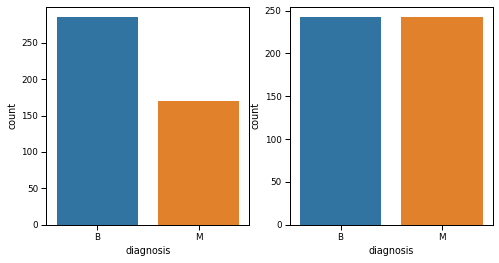

In [80]:

under_s = RandomUnderSampler(sampling_strategy=0.7)
new_dataset,new_y=under_s.fit_resample(X_red,y_train)

smote=SMOTE()
x_balance,y_balance=smote.fit_resample(new_dataset,new_y)
dataset_balance=pd.DataFrame(x_balance)
dataset_balance['diagnosis']=y_balance
sns.set_context("paper", font_scale=1)
fig, ax = plt.subplots(1,2,figsize=(8,4)) 
scaled_features_df['diagnosis']=y_train
sns.countplot(data=scaled_features_df,x='diagnosis',ax=ax[0])
sns.countplot(data=dataset_balance,x='diagnosis',ax=ax[1])

plt.show()


## Cross Validation

Furthermore, the train set needs to be divided again into:
* a real train set (on which the algorithm) is trained 
* a validation set (where the algorithm is validate in order to select the right parameters)

Now, we might risk to overfit the model by selecting the parameter that fits better the validation set, so the model may .. to the selction of the dataset.

Besides, to avoid overfitting on the validation set it is better to perform Cross Validation
It means that the dataset is firstly divided into **k subsets of euqal dimension**,then at each step:
* k-1 parts are used to train the algorithm 
* 1 part is used to validate the model

We perform this operation k time, at the end the results are averaged.

![image](figures/crossval.jpg)



### Metrics

* Accuracy: Number of corrected predictions over all the predictions 
$\frac{TP+TN}{TP+TN+FP+FN}$
Since we are dealing with an umbalanced dataset it will be better to use some metrics that take int account the ..

* f1-Score: Harmonic average of Recall and Precision 
* Recall: Number of corrected true over all the real true $\frac{TP}{TP+FN}$ For biological data it is preferred to use this metric since it is riskier to have a false negative rather than a false positive
* Precision:  Number of corrected true over all the elements predicted as true  $\frac{TP}{TP+FP}$


In [82]:

y=dataset_balance['diagnosis']
X=dataset_balance.drop(columns='diagnosis')



To find the right parametrs for each algorithm a **gridsearch** is performed, so for each algorithm a different values of parameters are tried sequentially.
The best model is the one that maximizes the measure of .., and the best parameters are the hyperparameters associated to it.

#  Decision tree

Decision tree is a classification algorithm based on decision rules.
The beginning of the tree is called root node and represents the beginning of the analysis, so at that step the dataset is still one.
Each internal node represents a test on an attribute, so at each node the dataset is splitted in 2 parts based on one attribute at time. The ending nodes are called leaves and are  the predicted class, at the end each outcome can be described as a chain of decision rule 

<img src="figures/decisiontree.png" width="400">

The procedure is greedy and based on the pureness of the splitting: at each split you select the attribute that perform the 'best split'.
The best split means that the two subgroups created after the split:

* Minimize the **Gini index**: $G= \sum_{k=1}^{K} p_{mk}(1-p_{mk})$

Sum over all the k class of the split, $p_{km}$ is the probability that an element of..,It measures the purity of a split..

* **Cross-Entropy**: $C=\sum_{k=1}^{K} p_{mk}\log(p_{mk})$

So the tree is a recursively splitting based on the attribute that better divide the dataset.

The problem with this algorithm is that it tends to overfit the dataset, so we need to insert some stop condition to the growning of the tree.
Which are:

* Maximum depth of the tree
* Minimum samples in leaf nodes
* Minimum reduction in the error metric




In [46]:
#tree
from sklearn.model_selection import ParameterGrid
f1=[]
accuracy=[]
recall=[]
precision=[]


pipeline=make_pipeline(RandomUnderSampler(sampling_strategy=0.7), SMOTE(),tree.DecisionTreeClassifier())
GridSearchCV(pipeline, param_grid=new_params, cv=5, scoring=metrics, refit='recall', return_train_score=True)
        clf = tree.DecisionTreeClassifier(criterion=criterion,)#,class_weight={0:,1: sum()})
        cross_val_score(clf, X, y, cv=5)
        clf.fit(X,y)

        y_pred=clf.predict(X_test)
        print(f1_score(y_pred,y_test))
        print(accuracy_score(y_pred,y_test))
        print()

0.9130434782608695
0.9298245614035088

0.9318181818181819
0.9473684210526315

0.9438202247191011
0.956140350877193

0.9534883720930233
0.9649122807017544



# Bootstrap aggregating (Bagging)


Bagging is a process that exploits the fact that averaging a set of observations reduces variance. 
So we create more  sample uniformly and with replacement from the orginal dataset in order to have different dataset.
In this way we train algorithm that are indipendent from each other 
The ouput of each model is then used to .. averaging or voting.
Can be performed in parallel
also it is useful to avoid overfitting

$f_{bag}=\frac{1}{B}\sum_{b=1}^{B}f^b(x)$

Given a set of n obsrvation of variance $\sigma$, the variance of the mean of the observation is $\frac{\sigma}{n}$

# Random forest

Random forest is an ensemble tecnique based on a large number of uncorrelated decision trees, each of them predict something and then the result is obtain thoright the majority voting.
Each decision tree is fed with a random sample of the original dataset, the precision of this model is bigger than the one of a single decision tree due to the wisdom of the crowd.

'uncorrelated models can produce ensemble predictions that are more accurate than any of the individual predictions

randomly sample from the dataset with replacement, resulting in different trees. This process is known as bagging.
So each decision tree is trained on a different set of the dataset and so each tree is split in different ways.
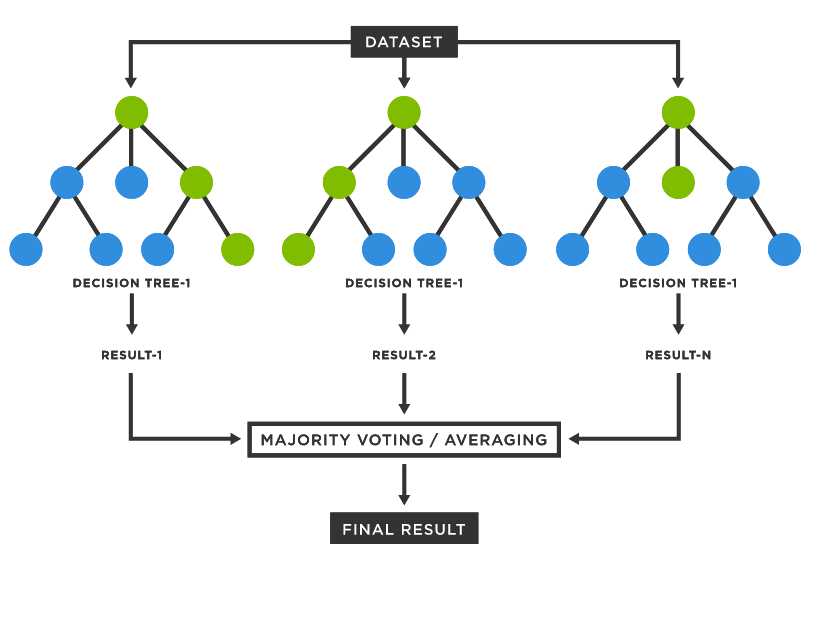

In [47]:
#RandomForestClassifier
clf=RandomForestClassifier()

clf = clf.fit(X_train, y_train)

y_pred=list(clf.predict(X_test))
print(f1_score(y_pred,y_test))
print(accuracy_score(y_pred,y_test))

0.9534883720930233
0.9649122807017544


## Boosting 

Boosting is similar to bagging however the fitting phase is not performed in parallel but it is consequential. Its main goal is to reduce not only vriance but also bias.
Different training set are created by randomly sampling the original dataset, the model is trained on one dataset at time and the models iteratively giving more importance to the samples that are misclassified in the previous step.


### Adaptive Boosting (AdaBoost)

The main of AdaBoost is to creating a strong learner from a series of weak learner, it takes as input the original dataset at time and proceeds for T ieterations.

At each iteration **t from 0 to T**:
* A distribution **D(t)** is selected over the samples S
* The weak algorithm is trained to return an hypothesis $h_t$, whose error it is at most $\frac{1}{2}-\gamma$
* It is assigned a weight to this distribution that is inversely proportional to the error
* In this way samples that are miscassified will have a heavier weight

So the learner is forced to focus its attention to the sample more difficult.



# SVC

Support Vector Machine is a classification algorithm that aims to find the hyperplane that divides the hyperspace of the original data into subspaces that divide the classes.

The hyperplane is defined as $y_i$($\langle$ w, $x_i$ $\rangle$ $+ b ) > 0 $, whre the margin is defined as the distance to the closest examples that is called support vectors

* Hard SVM: 

\begin{equation}
\arg\max_{(w,b):||w||=1} \min{|\langle w,x_i \rangle} +b| s.t. \forall i y_i(\langle w,x_i \rangle +b) >0
\end{equation}

But is is assuming that data ar separable, which it is not always true! To solve this problem we can relax some constrains.
* Soft-Margin SVM:
\begin{equation}
\arg\min_{w,b,\xi} (\lambda||w||^2 + \frac{1}{m} \sum_{i=1}^{m}\xi_i)
\end{equation}
A slack variable is added to overcome the problem, in this way misclassification is possible paying a price. \lambda is the tradeoff between misclassification and maximize the margin

In [ ]:
#LinearSVC
clf=LinearSVC()
clf = clf.fit(X_train, y_train)

y_pred=list(clf.predict(X_test))
print(f1_score(y_pred,y_test))
print(accuracy_score(y_pred,y_test))

### The kernel trick


It is not always possible to find a hyperplane that linearly divides the classes, for this reason sometimes it is needed to pass to an higher dimensional space, divided the samples, and then return into the original space. 
To do so, we can map the samples x into a spece of higher dimension:
$x \rightarrow \phi(x) $
where classes are linearly separable

In [51]:
clf=SVC(kernel='sigmoid')
clf = clf.fit(X_train, y_train)

y_pred=list(clf.predict(X_test))
print(f1_score(y_pred,y_test))
print(accuracy_score(y_pred,y_test))


0.9438202247191011
0.956140350877193
